# ARIMA model

In [ ]:
  ####### You may need this section to download the dataset you'll need ####### 
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2012, 6, 1)
end = datetime.datetime(2020, 6, 1)

df = web.DataReader("GOOGL","yahoo" ,start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,1445.109985,1419.400024,1441.959961,1421.369995,2229500.0,1421.369995
2020-05-27,1425.349976,1394.599976,1420.000000,1420.280029,1584200.0,1420.280029
2020-05-28,1444.459961,1399.079956,1400.000000,1418.239990,1758500.0,1418.239990
2020-05-29,1436.729980,1415.979980,1420.430054,1433.520020,1852200.0,1433.520020
2020-06-01,1441.579956,1422.280029,1425.699951,1434.869995,1258100.0,1434.869995


In [ ]:
####### You may need this section to answer questions about the ARIMA model #######
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


predicted=1405.152895, expected=1375.180054
predicted=1374.320686, expected=1348.329956
predicted=1357.116736, expected=1356.859985
predicted=1354.159291, expected=1373.060059
predicted=1374.480236, expected=1385.180054
predicted=1381.148690, expected=1374.400024
predicted=1377.974652, expected=1409.160034
predicted=1404.963332, expected=1406.750000
predicted=1406.627757, expected=1413.239990
predicted=1413.453892, expected=1421.369995
predicted=1420.471185, expected=1420.280029
predicted=1420.958682, expected=1418.239990
predicted=1419.005459, expected=1433.520020
predicted=1432.869961, expected=1434.869995
This took 6.9596030712127686 seconds.
Test MSE: 242.53084608


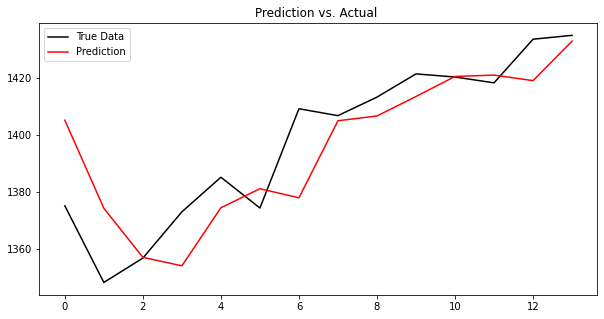

In [ ]:
# complete this part
Input = df['Close'].values
X = Input
start = time.time()
size = len(X)-14 
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,2)) #do not change the order
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
end = time.time()
print('This took {} seconds.'.format(end - start))

error = mean_squared_error(test, predictions)
print('Test MSE: %.8f' % error)
# plot
from matplotlib import pyplot as plt
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title('Prediction vs. Actual ')
    ax.plot(true_data, label='True Data', color='black')
    ax.plot(predicted_data, label='Prediction', color='red')
    plt.legend()
    plt.savefig('arima.jpg',dpi=200,quality=95,bbox_inches='tight')
    plt.show()

plot_predicted(predictions, test)

# Create dataset

In [ ]:
import numpy as np
x = df.values
MIN = np.min(x,0)
MAX = np.max(x,0)
# normalize data
x = (x-MIN)/(MAX-MIN)
seq = []
num_seq = 14
# create sequential data
for i in range(x.shape[0]):
  if i+num_seq>(x.shape[0]-1):
    break
  seq.append(x[i:i+num_seq,[0,1,2,4,5]])

n_test = 100
seq = np.array(seq)
# create test and train data
x_train = seq[:x.shape[0]-(n_test+num_seq)].reshape(-1,num_seq,5)
y_train = x[num_seq:x.shape[0]-n_test,3]
x_test = seq[x.shape[0]-(n_test+num_seq):].reshape(-1,num_seq,5)
y_test = x[x.shape[0]-n_test:,3]

# Model (part 1-4)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,SimpleRNN
import time
t1 = time.time()
model = Sequential()
model.add(GRU(40,activation='relu',input_shape=(num_seq,5),dropout=0.1))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train,y_train,epochs=50,batch_size=40,
                    validation_data=(x_test,y_test))
print('\n\nRun time = %.2f'%(time.time()-t1))
# model.summary()

Epoch 1/50
48/48 [==============================] - 3s 37ms/step - loss: 0.2371 - val_loss: 0.0081
Epoch 2/50
48/48 [==============================] - 2s 32ms/step - loss: 0.0080 - val_loss: 0.0043
Epoch 3/50
48/48 [==============================] - 2s 32ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 4/50
48/48 [==============================] - 2s 31ms/step - loss: 5.9513e-04 - val_loss: 0.0068
Epoch 5/50
48/48 [==============================] - 2s 34ms/step - loss: 3.6493e-04 - val_loss: 0.0080
Epoch 6/50
48/48 [==============================] - 2s 34ms/step - loss: 3.2313e-04 - val_loss: 0.0082
Epoch 7/50
48/48 [==============================] - 2s 33ms/step - loss: 3.0455e-04 - val_loss: 0.0099
Epoch 8/50
48/48 [==============================] - 2s 34ms/step - loss: 3.1489e-04 - val_loss: 0.0095
Epoch 9/50
48/48 [==============================] - 2s 35ms/step - loss: 2.4606e-04 - val_loss: 0.0090
Epoch 10/50
48/48 [==============================] - 2s 34ms/step - loss: 2.5971e-04 

# Showing results

Loss for train = 0.00247
Loss for test = 0.00911


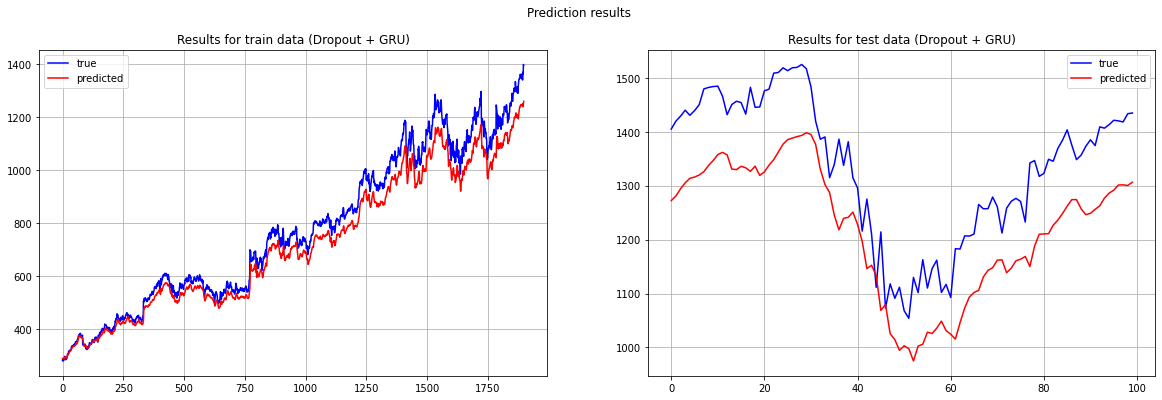

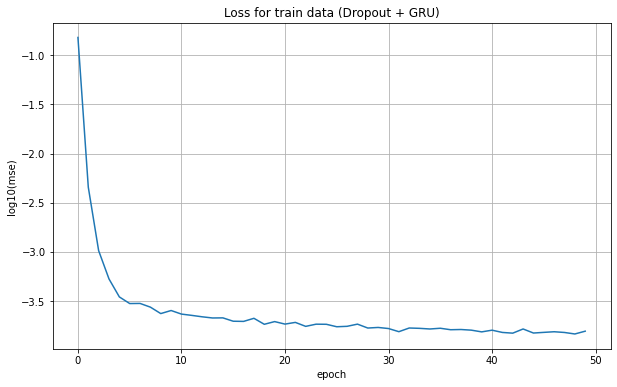

In [ ]:
import matplotlib.pyplot as plt
# evaluation for test and train
l_train = model.evaluate(x_train,y_train,verbose=0)
l_test = model.evaluate(x_test,y_test,verbose=0)
print('Loss for train = %.5f'%l_train)
print('Loss for test = %.5f'%l_test)
# result for train data
y_train_pred = model.predict(x_train)
y_train_pred = y_train_pred*(MAX[3]-MIN[3])+MIN[3]
y_train2 = y_train*(MAX[3]-MIN[3])+MIN[3]
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_train2,'b',label='true')
plt.plot(y_train_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for train data (Dropout + GRU)')
# result for test data
y_test_pred = model.predict(x_test)
y_test_pred = y_test_pred*(MAX[3]-MIN[3])+MIN[3]
y_test2 = y_test*(MAX[3]-MIN[3])+MIN[3]
plt.subplot(1,2,2)
plt.plot(y_test2,'b',label='true')
plt.plot(y_test_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for test data (Dropout + GRU)')
plt.suptitle('Prediction results')
plt.savefig('Dropout_GRU.jpg',dpi=300,quality=95,bbox_inches='tight')
# loss for train data
plt.figure(figsize=(10,6))
plt.plot(np.log10(history.history['loss']))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log10(mse)')
plt.title('Loss for train data (Dropout + GRU)')
plt.savefig('loss_Dropout_GRU.jpg',dpi=300,quality=95,bbox_inches='tight')

# Compare RNN with ARIMA

Create dataset

In [ ]:
import numpy as np
x = df.values
MIN = np.min(x,0)
MAX = np.max(x,0)
# normalize data
x = (x-MIN)/(MAX-MIN)
seq = []
num_seq = 14
# create sequential data
for i in range(x.shape[0]):
  if i+num_seq>(x.shape[0]-1):
    break
  seq.append(x[i:i+num_seq,[3]])

n_test = 14
seq = np.array(seq)
# create test and train data
x_train = seq[:x.shape[0]-(n_test+num_seq)].reshape(-1,num_seq,1)
y_train = x[num_seq:x.shape[0]-n_test,3]
x_test = seq[x.shape[0]-(n_test+num_seq):].reshape(-1,num_seq,1)
y_test = x[x.shape[0]-n_test:,3]

Model (part 5)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,SimpleRNN
import time
t1 = time.time()
model = Sequential()
model.add(GRU(40,activation='relu',input_shape=(num_seq,1),dropout=0.0))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train,y_train,epochs=50,batch_size=40,
                    validation_data=(x_test,y_test))
print('\n\nRun time = %.2f'%(time.time()-t1))

Epoch 1/50
50/50 [==============================] - 3s 35ms/step - loss: 0.0732 - val_loss: 0.0123
Epoch 2/50
50/50 [==============================] - 2s 30ms/step - loss: 0.0013 - val_loss: 1.6507e-04
Epoch 3/50
50/50 [==============================] - 2s 31ms/step - loss: 2.5968e-04 - val_loss: 1.8250e-04
Epoch 4/50
50/50 [==============================] - 2s 30ms/step - loss: 1.9946e-04 - val_loss: 2.8295e-04
Epoch 5/50
50/50 [==============================] - 2s 32ms/step - loss: 1.9212e-04 - val_loss: 1.7381e-04
Epoch 6/50
50/50 [==============================] - 2s 31ms/step - loss: 1.8226e-04 - val_loss: 1.6106e-04
Epoch 7/50
50/50 [==============================] - 2s 31ms/step - loss: 1.6538e-04 - val_loss: 2.1330e-04
Epoch 8/50
50/50 [==============================] - 2s 31ms/step - loss: 1.6647e-04 - val_loss: 1.6161e-04
Epoch 9/50
50/50 [==============================] - 2s 31ms/step - loss: 1.6269e-04 - val_loss: 1.6058e-04
Epoch 10/50
50/50 [==============================

Showing results

ARIMA MSE for test = 242.53
RNN MSE for test = 272.82


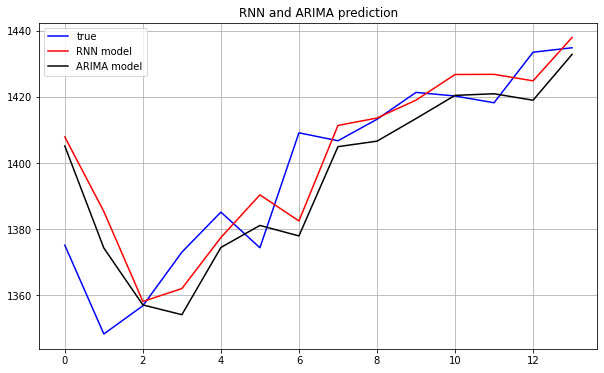

In [ ]:
import matplotlib.pyplot as plt
# result for test data
y_test_pred = model.predict(x_test)
y_test_pred = y_test_pred*(MAX[3]-MIN[3])+MIN[3]
y_test2 = y_test*(MAX[3]-MIN[3])+MIN[3]
rnn_error = mean_squared_error(y_test2,y_test_pred)
print('ARIMA MSE for test = %.2f'%error)
print('RNN MSE for test = %.2f'%rnn_error)
plt.figure(figsize=(10,6))
plt.plot(y_test2,'b',label='true')
plt.plot(y_test_pred,'r',label='RNN model')
plt.plot(predictions,'k',label='ARIMA model')
plt.grid()
plt.legend()
plt.title('RNN and ARIMA prediction')
plt.savefig('rnn_arima.jpg',dpi=300,quality=95,bbox_inches='tight')

# Feature selection (part 6)

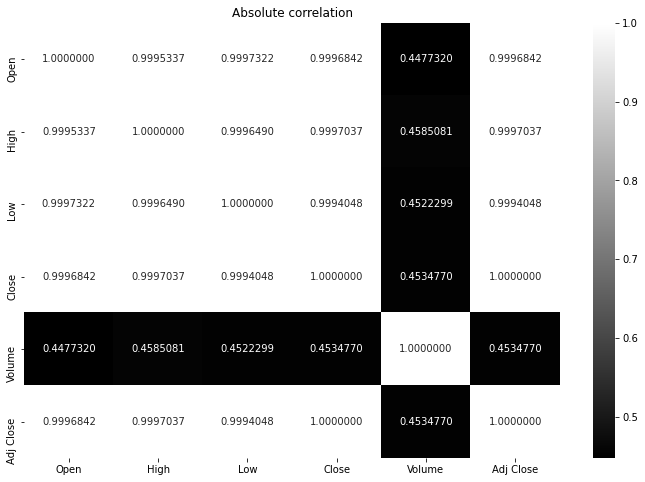

In [ ]:
import seaborn as sn
x = df.values
c = np.corrcoef(x.T)
label = ['Open','High','Low','Close','Volume','Adj Close']
plt.figure(figsize=(12,8))
sn.heatmap(abs(c),cmap='gray',annot=True,fmt=".7f",
           xticklabels=label, yticklabels=label)
plt.title('Absolute correlation')
plt.savefig('corr.jpg',dpi=300,quality=95,bbox_inches='tight')

# Adding hidden layer (part 7)

Create dataset

In [ ]:
import numpy as np
x = df.values
MIN = np.min(x,0)
MAX = np.max(x,0)
# normalize data
x = (x-MIN)/(MAX-MIN)
seq = []
num_seq = 14
# create sequential data
for i in range(x.shape[0]):
  if i+num_seq>(x.shape[0]-1):
    break
  seq.append(x[i:i+num_seq,[0,1,2,4,5]])

n_test = 100
seq = np.array(seq)
# create test and train data
x_train = seq[:x.shape[0]-(n_test+num_seq)].reshape(-1,num_seq,5)
y_train = x[num_seq:x.shape[0]-n_test,3]
x_test = seq[x.shape[0]-(n_test+num_seq):].reshape(-1,num_seq,5)
y_test = x[x.shape[0]-n_test:,3]

Model (part 7)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,SimpleRNN
import time
t1 = time.time()
model = Sequential()
model.add(GRU(40,activation='relu',input_shape=(num_seq,5),dropout=0.1,
              return_sequences=True))
model.add(GRU(20,activation='relu',dropout=0.1))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train,y_train,epochs=50,batch_size=40,
                    validation_data=(x_test,y_test))
print('\n\nRun time = %.2f'%(time.time()-t1))

Epoch 1/50
48/48 [==============================] - 6s 72ms/step - loss: 0.0730 - val_loss: 0.0054
Epoch 2/50
48/48 [==============================] - 3s 61ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 3/50
48/48 [==============================] - 3s 63ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 4/50
48/48 [==============================] - 3s 67ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 5/50
48/48 [==============================] - 3s 62ms/step - loss: 0.0010 - val_loss: 0.0083
Epoch 6/50
48/48 [==============================] - 3s 62ms/step - loss: 8.4594e-04 - val_loss: 0.0077
Epoch 7/50
48/48 [==============================] - 3s 62ms/step - loss: 7.1720e-04 - val_loss: 0.0105
Epoch 8/50
48/48 [==============================] - 3s 63ms/step - loss: 6.1248e-04 - val_loss: 0.0114
Epoch 9/50
48/48 [==============================] - 3s 63ms/step - loss: 5.4163e-04 - val_loss: 0.0139
Epoch 10/50
48/48 [==============================] - 3s 64ms/step - loss: 5.3289e-04 - val_lo

Showing results

Loss for train = 0.00470
Loss for test = 0.01990


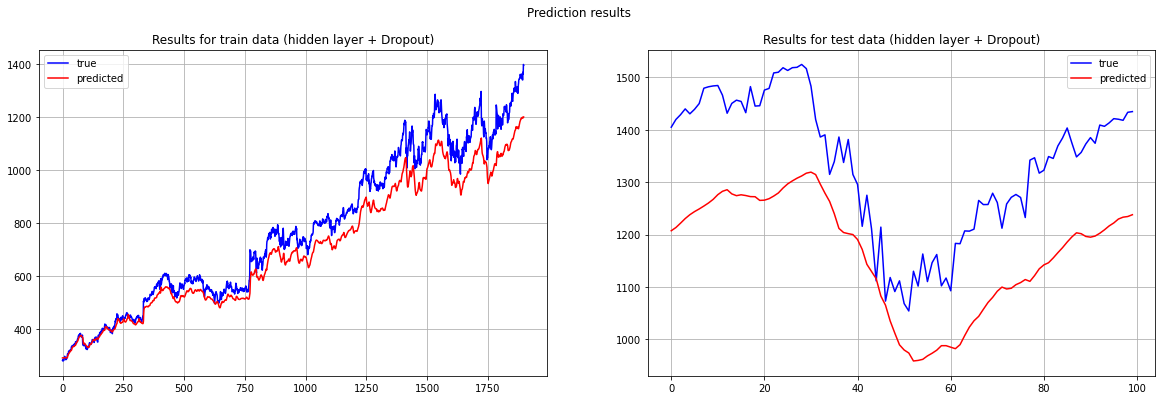

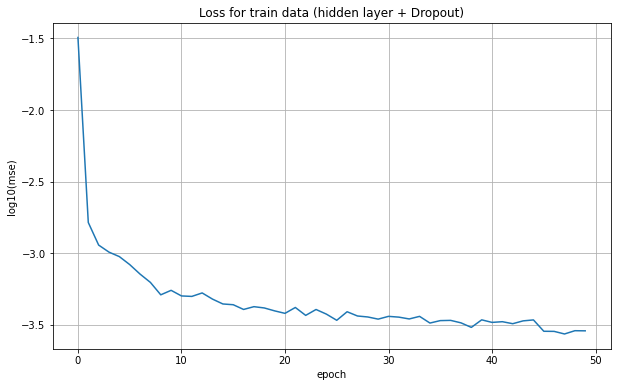

In [ ]:
import matplotlib.pyplot as plt
# evaluation for test and train
l_train = model.evaluate(x_train,y_train,verbose=0)
l_test = model.evaluate(x_test,y_test,verbose=0)
print('Loss for train = %.5f'%l_train)
print('Loss for test = %.5f'%l_test)
# result for train data
y_train_pred = model.predict(x_train)
y_train_pred = y_train_pred*(MAX[3]-MIN[3])+MIN[3]
y_train2 = y_train*(MAX[3]-MIN[3])+MIN[3]
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_train2,'b',label='true')
plt.plot(y_train_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for train data (hidden layer + Dropout)')
# result for test data
y_test_pred = model.predict(x_test)
y_test_pred = y_test_pred*(MAX[3]-MIN[3])+MIN[3]
y_test2 = y_test*(MAX[3]-MIN[3])+MIN[3]
plt.subplot(1,2,2)
plt.plot(y_test2,'b',label='true')
plt.plot(y_test_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for test data (hidden layer + Dropout)')
plt.suptitle('Prediction results')
plt.savefig('hidden_drop.jpg',dpi=300,quality=95,bbox_inches='tight')
# loss for train data
plt.figure(figsize=(10,6))
plt.plot(np.log10(history.history['loss']))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log10(mse)')
plt.title('Loss for train data (hidden layer + Dropout)')
plt.savefig('loss_hidden_drop.jpg',dpi=300,quality=95,bbox_inches='tight')

# Conv + LSTM (part 9)

Create dataset

In [ ]:
import numpy as np
x = df.values
MIN = np.min(x,0)
MAX = np.max(x,0)
# normalize data
x = (x-MIN)/(MAX-MIN)
seq = []
num_seq = 14
# create sequential data
for i in range(x.shape[0]):
  if i+num_seq>(x.shape[0]-1):
    break
  seq.append(x[i:i+num_seq,[0,1,2,4,5]])

n_test = 100
seq = np.array(seq)
# create test and train data
x_train = seq[:x.shape[0]-(n_test+num_seq)].reshape(-1,2,7,5)
y_train = x[num_seq:x.shape[0]-n_test,3]
x_test = seq[x.shape[0]-(n_test+num_seq):].reshape(-1,2,7,5)
y_test = x[x.shape[0]-n_test:,3]

Model (part 9)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,TimeDistributed,Conv1D,MaxPooling1D,Flatten
import time
t1 = time.time()
model = Sequential()
model.add(TimeDistributed(Conv1D(30,2),input_shape=(None,7,5)))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(40,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train,y_train,epochs=50,batch_size=40,
                    validation_data=(x_test,y_test))
print('\n\nRun time = %.2f'%(time.time()-t1))
# model.summary()

Epoch 1/50
48/48 [==============================] - 2s 15ms/step - loss: 0.0776 - val_loss: 0.0142
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 8.2186e-04 - val_loss: 0.0073
Epoch 3/50
48/48 [==============================] - 0s 7ms/step - loss: 5.2540e-04 - val_loss: 0.0055
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 4.1308e-04 - val_loss: 0.0055
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 4.3285e-04 - val_loss: 0.0046
Epoch 6/50
48/48 [==============================] - 0s 7ms/step - loss: 3.8777e-04 - val_loss: 0.0048
Epoch 7/50
48/48 [==============================] - 0s 7ms/step - loss: 3.9989e-04 - val_loss: 0.0032
Epoch 8/50
48/48 [==============================] - 0s 6ms/step - loss: 3.2210e-04 - val_loss: 0.0033
Epoch 9/50
48/48 [==============================] - 0s 7ms/step - loss: 2.8461e-04 - val_loss: 0.0025
Epoch 10/50
48/48 [==============================] - 0s 7ms/step - loss: 2.7203e-04 -

Showing results

Loss for train = 0.00013
Loss for test = 0.00091


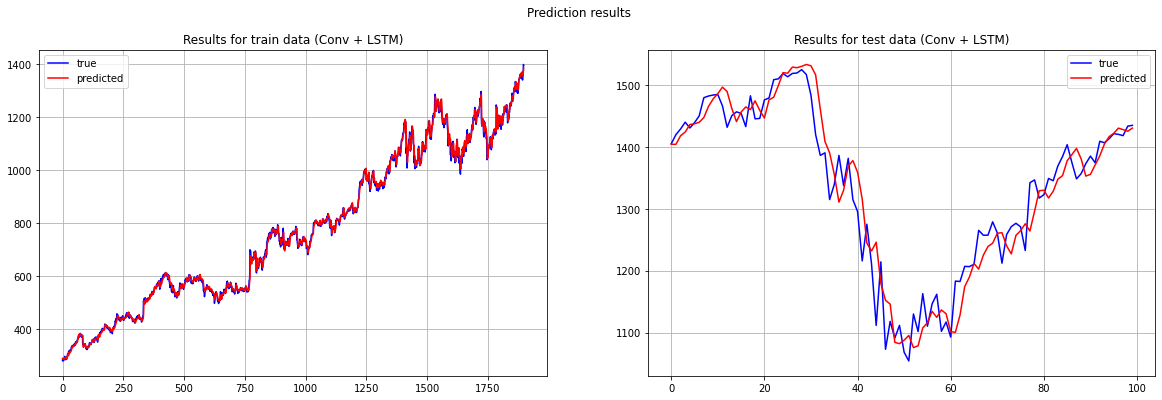

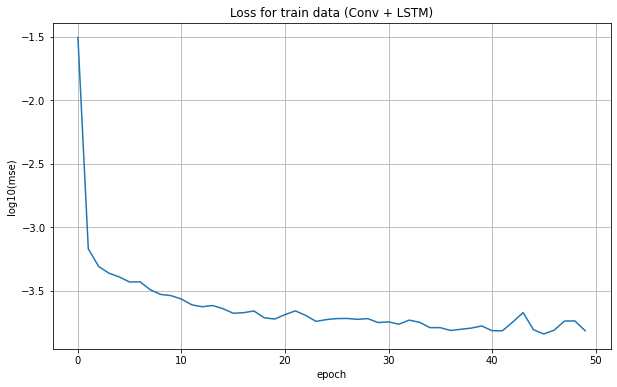

In [ ]:
import matplotlib.pyplot as plt
# evaluation for test and train
l_train = model.evaluate(x_train,y_train,verbose=0)
l_test = model.evaluate(x_test,y_test,verbose=0)
print('Loss for train = %.5f'%l_train)
print('Loss for test = %.5f'%l_test)
# result for train data
y_train_pred = model.predict(x_train)
y_train_pred = y_train_pred*(MAX[3]-MIN[3])+MIN[3]
y_train2 = y_train*(MAX[3]-MIN[3])+MIN[3]
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_train2,'b',label='true')
plt.plot(y_train_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for train data (Conv + LSTM)')
# result for test data
y_test_pred = model.predict(x_test)
y_test_pred = y_test_pred*(MAX[3]-MIN[3])+MIN[3]
y_test2 = y_test*(MAX[3]-MIN[3])+MIN[3]
plt.subplot(1,2,2)
plt.plot(y_test2,'b',label='true')
plt.plot(y_test_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for test data (Conv + LSTM)')
plt.suptitle('Prediction results')
plt.savefig('cnn.jpg',dpi=300,quality=95,bbox_inches='tight')
# loss for train data
plt.figure(figsize=(10,6))
plt.plot(np.log10(history.history['loss']))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log10(mse)')
plt.title('Loss for train data (Conv + LSTM)')
plt.savefig('loss_cnn.jpg',dpi=300,quality=95,bbox_inches='tight')

# Defective data (part 11-12)

In [ ]:
import numpy as np
x = df.values
k = int(x.shape[0]*0.25)
missed = []
deleted = []
# make 25% of data missed
for i in range(6):
  r = np.random.choice(np.arange(x.shape[0]),k,replace=False)
  temp = x[:,i].copy()
  temp[r] = np.nan
  missed.append(temp)
  deleted.append(np.delete(x[:,i],r))

x_missed = np.array(missed).T
q = np.arange(x.shape[0])
# interpolation for missed data
for i in range(6):
  ind_nan = q[np.isnan(x_missed[:,i])]
  ind_val = np.delete(q,ind_nan)
  for j in ind_nan:
    t = ind_val.copy()
    t = np.abs(t-j)
    (m1) = np.where(t==t.min())
    x_missed[j,i] = np.mean(x_missed[ind_val[m1],i])
# calculate mse
for i in range(6):
  err = mean_squared_error(x[:,i],x_missed[:,i])
  print('MSE original and interpolated feature %d = %.2f'%(i+1,err))

MSE original and interpolated feature 1 = 30.58
MSE original and interpolated feature 2 = 24.56
MSE original and interpolated feature 3 = 38.33
MSE original and interpolated feature 4 = 56.60
MSE original and interpolated feature 5 = 223293250895.87
MSE original and interpolated feature 6 = 43.44


Delete missed data

In [ ]:
x = np.array(deleted).T
MIN = np.min(x,0)
MAX = np.max(x,0)
# normalize data
x = (x-MIN)/(MAX-MIN)
seq = []
num_seq = 14
# create sequential data
for i in range(x.shape[0]):
  if i+num_seq>(x.shape[0]-1):
    break
  seq.append(x[i:i+num_seq,[0,1,2,4,5]])

n_test = 100
seq = np.array(seq)
# create train data
x_train = seq[:x.shape[0]-(n_test+num_seq)].reshape(-1,num_seq,5)
y_train = x[num_seq:x.shape[0]-n_test,3]

Model (part 12)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,SimpleRNN
import time
t1 = time.time()
model = Sequential()
model.add(GRU(40,activation='relu',input_shape=(num_seq,5),dropout=0))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse')
history = model.fit(x_train,y_train,epochs=50,batch_size=40,
                    validation_data=(x_test.reshape(-1,14,5),y_test))
print('\n\nRun time = %.2f'%(time.time()-t1))

Epoch 1/50
35/35 [==============================] - 2s 35ms/step - loss: 0.1034 - val_loss: 0.0011
Epoch 2/50
35/35 [==============================] - 1s 30ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/50
35/35 [==============================] - 1s 29ms/step - loss: 9.8368e-04 - val_loss: 0.0011
Epoch 4/50
35/35 [==============================] - 1s 30ms/step - loss: 8.0819e-04 - val_loss: 0.0010
Epoch 5/50
35/35 [==============================] - 1s 30ms/step - loss: 7.6806e-04 - val_loss: 0.0011
Epoch 6/50
35/35 [==============================] - 1s 30ms/step - loss: 8.4319e-04 - val_loss: 0.0012
Epoch 7/50
35/35 [==============================] - 1s 30ms/step - loss: 7.0477e-04 - val_loss: 0.0010
Epoch 8/50
35/35 [==============================] - 1s 30ms/step - loss: 7.2580e-04 - val_loss: 0.0011
Epoch 9/50
35/35 [==============================] - 1s 29ms/step - loss: 7.2946e-04 - val_loss: 9.8494e-04
Epoch 10/50
35/35 [==============================] - 1s 29ms/step - loss: 7.1

Showing results

Loss for train = 0.00042
Loss for test = 0.00099


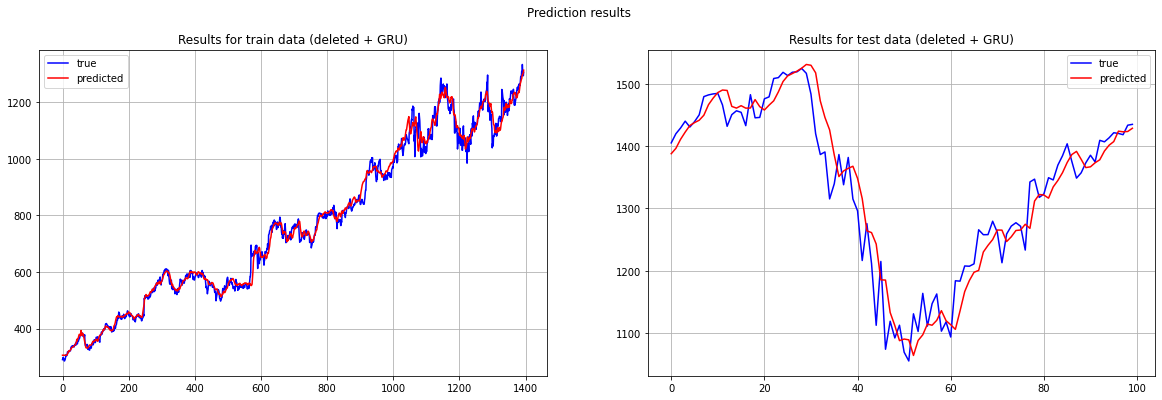

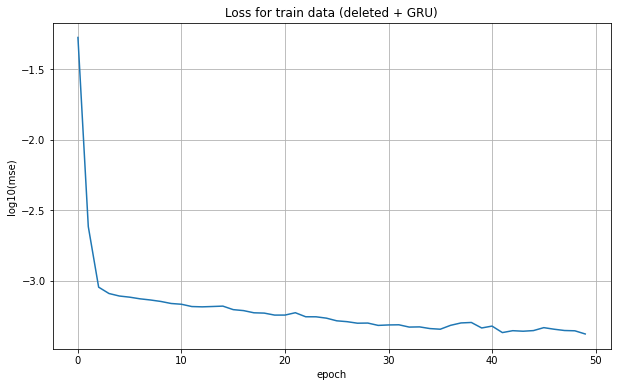

In [ ]:
import matplotlib.pyplot as plt
# evaluation for test and train
l_train = model.evaluate(x_train,y_train,verbose=0)
l_test = model.evaluate(x_test.reshape(-1,14,5),y_test,verbose=0)
print('Loss for train = %.5f'%l_train)
print('Loss for test = %.5f'%l_test)
# result for train data
y_train_pred = model.predict(x_train)
y_train_pred = y_train_pred*(MAX[3]-MIN[3])+MIN[3]
y_train2 = y_train*(MAX[3]-MIN[3])+MIN[3]
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_train2,'b',label='true')
plt.plot(y_train_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for train data (deleted + GRU)')
# result for test data
y_test_pred = model.predict(x_test.reshape(-1,14,5))
y_test_pred = y_test_pred*(MAX[3]-MIN[3])+MIN[3]
y_test2 = y_test*(MAX[3]-MIN[3])+MIN[3]
plt.subplot(1,2,2)
plt.plot(y_test2,'b',label='true')
plt.plot(y_test_pred,'r',label='predicted')
plt.grid()
plt.legend()
plt.title('Results for test data (deleted + GRU)')
plt.suptitle('Prediction results')
plt.savefig('deleted_GRU.jpg',dpi=300,quality=95,bbox_inches='tight')
# loss for train data
plt.figure(figsize=(10,6))
plt.plot(np.log10(history.history['loss']))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log10(mse)')
plt.title('Loss for train data (deleted + GRU)')
plt.savefig('loss_deleted_GRU.jpg',dpi=300,quality=95,bbox_inches='tight')